<a href="https://colab.research.google.com/github/dinhtoan-uit/CS114.K21/blob/master/Mid_term_data2_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tiến hành import các thư viện cần thiết cho bài toán:
- pandas để đọc file dữ liệu với định dạng csv
- numpy để thực hiện tính toán với mảng dữ liệu
- matplotlib với hàm pyplot để trực quan hóa dữ liệu, giúp ta chọn được model để train cho phù hợp

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Sử dụng wget để lấy dữ liệu từ web về, bằng cách download file data2.txt về ổ đĩa ảo của Google Colab




In [24]:
!wget http://cs.uit.edu.vn/data2.txt

--2020-06-25 10:51:25--  http://cs.uit.edu.vn/data2.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1203726 (1.1M) [text/plain]
Saving to: ‘data2.txt.1’

data2.txt.1         100%[===================>]   1.15M  1.22MB/s    in 0.9s    

2020-06-25 10:51:26 (1.22 MB/s) - ‘data2.txt.1’ saved [1203726/1203726]



Tiếp đến ta dùng phương thức read_csv trong thư viện pandas để đọc dữ liệu từ file đã tải về

In [25]:
dataset = pd.read_csv('data2.txt', header=None)

Sử dụng phương thức head() không tham số, ta thu được 5 hàng đầu tiên trong bộ dữ liệu. Từ đó quan sát được bộ dữ liệu gồm 2 cột

In [26]:
dataset.head()

,0,1
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


Cột 0 là cột đặc tính có ảnh hưởng tới thời gian thực thi chương trình. Do đó, ta thiết lập vector X là cột đầu tiên. Cột đặc tính chỉ có 1 chiều.
Cột 1 là cột kết quả thời gian thực thi chương trình. Do đó, ta thiết lập vector Y là cột tiếp theo.

In [27]:
X = np.array(dataset.iloc[:, 0].values).reshape(-1, 1)
Y = np.array(dataset.iloc[:, 1].values)

Thực hiện import thư viện scikitlearn để ta sử dụng phương thức train_test_split() trong module model_selection

In [28]:
from sklearn.model_selection import train_test_split

Ta chia bộ dữ liệu thành 2 tập train để huấn luyện và tập test để dự đoán kết quả từ model tìm được từ tập train với tỉ lệ train, test là 0.8 và 0.2

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

Trực quan hóa dữ liệu thông qua các hàm
- scatter để trực quan hóa từng cặp điểm (Xi,Yi) trên mặt phẳng tọa độ, với thuộc tính color='red' thì từng điểm sẽ được tô bằng màu đỏ
- title để đặt tên cho đồ thị là "H"
- xlabel, ylabel để lần lượt đặt tên cho trục hoành, trục tung là "Feature" và "Time"
- show để vẽ đồ thị và in ra màn hình

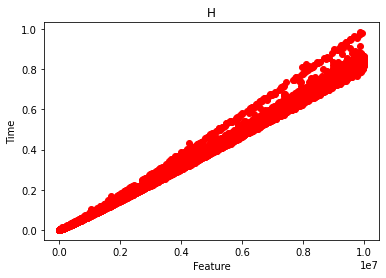

In [30]:
plt.scatter(X_train, Y_train, color = "red")
plt.title("H")
plt.xlabel("Feature")
plt.ylabel("Time")
plt.show()

Từ đây ta thấy X, Y là dữ liệu không liên tục; đồng thời X chỉ có 1 chiều nên ta sử dụng Linear Regression

Tiến hành import linear_model trong thư viện sklearn để sử dụng phương thức LinearRegression()

In [31]:
from sklearn.linear_model import LinearRegression

Biến thực thể regressor là nhân tố để người dùng có thể tác động đối với model thu được

In [32]:
regressor = LinearRegression()

Phương thức fit() hỗ trợ người dùng thiết kế model dựa trên tập dữ liệu train

In [33]:
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Trực quan hóa model với Y_train_pred là dự đoán có được thông qua việc sử dụng model với đặc tính X_train. Đồng thời, trực quan hóa model bằng phương thức plot() với color='blue' cho ta model được tô bằng màu xanh dương

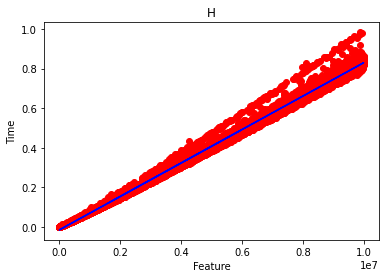

In [34]:
Y_train_pred = regressor.predict(X_train)
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_train, Y_train_pred, color = "blue")
plt.title("H")
plt.xlabel("Feature")
plt.ylabel("Time")
plt.show()

Với model ta thiết kế được, thực hiện dự đoán kết quả Y_test_pred với đặc tính X_test. Sau đó trực quan hóa dữ liệu test thu được lên đồ thị

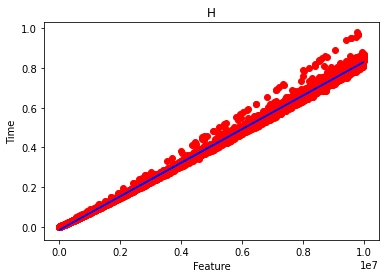

In [35]:
Y_test_pred = regressor.predict(X_test)
plt.scatter(X_test, Y_test, color = "red")
plt.plot(X_test, Y_test_pred, color = "blue")
plt.title("H")
plt.xlabel("Feature")
plt.ylabel("Time")
plt.show()

Để kiểm tra mức độ lỗi của một mô hình, chúng ta có thể sử dụng Mean Squared Error. Đây là một trong các phương pháp để đo trung bình của ô vuông của sai số. Về cơ bản, nó sẽ kiểm tra sự khác biệt giữa giá trị thực tế và giá trị dự đoán. Để sử dụng nó, chúng ta có thể sử dụng hàm bình phương trung bình sai số của scikit-learn bằng cách chạy đoạn mã này. Như vậy, ta đã tính được MSE của mô hình này, với mô hình khác, ta cũng có thể tính MSE tương tự sau đó so sánh 2 giá trị này, MSE càng nhỏ model càng tốt.

Để tránh tính toán, ta có thể trực tiếp import hàm mean_squared_error() từ phương thức metrics trong thư viện sklearn để tiến hành đo đạc lỗi

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse = mean_squared_error(Y_test, Y_test_pred)
print(mse)

0.00015229169816456062


Tiến hành import module Pickle để lưu lại model đã được huấn luyện

In [38]:
import pickle

Đặc tên cho file để lưu model là 'time_prediction'

In [39]:
filename = 'time_prediction'

Lưu model vào file trong thư mục hiện hành để phục vụ cho sau này

In [40]:
with open(filename, 'wb') as file:
  pickle.dump(regressor, file)